<a href="https://colab.research.google.com/github/HasibAlMuzdadid/Machine-Learning-and-Deep-Learning-Projects/blob/main/deep%20neural%20network%20%5Bwith%20different%20weight%20initialization%20techniques%5D/Improved_Deep_Neural_Network_with_different_weight_initialization_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Improved Deep Neural Network with different weight initialization techniques**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets

In [ ]:
# helper function
def sigmoid(x):
  s = 1/(1+np.exp(-x))
  return s

def relu(x):
  s = np.maximum(0,x)  
  return s

In [ ]:
def forward_propagation(X, parameters):
      
  # retrieve parameters
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  W3 = parameters["W3"]
  b3 = parameters["b3"]
    
  # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
  z1 = np.dot(W1, X) + b1
  a1 = relu(z1)
  z2 = np.dot(W2, a1) + b2
  a2 = relu(z2)
  z3 = np.dot(W3, a2) + b3
  a3 = sigmoid(z3)
    
  cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
  return a3, cache


def backward_propagation(X, Y, cache):
    
  m = X.shape[1]
  (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
  dz3 = 1./m * (a3 - Y)
  dW3 = np.dot(dz3, a2.T)
  db3 = np.sum(dz3, axis=1, keepdims = True)
    
  da2 = np.dot(W3.T, dz3)
  dz2 = np.multiply(da2, np.int64(a2 > 0))
  dW2 = np.dot(dz2, a1.T)
  db2 = np.sum(dz2, axis=1, keepdims = True)
    
  da1 = np.dot(W2.T, dz2)
  dz1 = np.multiply(da1, np.int64(a1 > 0))
  dW1 = np.dot(dz1, X.T)
  db1 = np.sum(dz1, axis=1, keepdims = True)
    
  gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
               "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
               "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
  return gradients


def update_parameters(parameters, grads, learning_rate):
   
  L = len(parameters) // 2 # number of layers in the neural networks

  # Update rule for each parameter
  for k in range(L):
    parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
    parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
  return parameters


def compute_loss(a3, Y):
    
  m = Y.shape[1]
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
  loss = 1./m * np.nansum(logprobs)
    
  return loss


def predict(X, y, parameters):
    
  m = X.shape[1]
  p = np.zeros((1,m), dtype = np.int)
    
  # Forward propagation
  a3, caches = forward_propagation(X, parameters)
    
  # convert probas to 0/1 predictions
  for i in range(0, a3.shape[1]):
    if a3[0,i] > 0.5:
      p[0,i] = 1
    else:
      p[0,i] = 0

  # print results
  print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
  return p


def plot_decision_boundary(model, X, y):
  
  # Set min and max values and give it some padding
  x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
  y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
  h = 0.01

  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Predict the function value for the whole grid
  Z = model(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour and training examples
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.ylabel('x2')
  plt.xlabel('x1')
  plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
  plt.show()
    

def predict_dec(parameters, X):
   
  # Predict using forward propagation and a classification threshold of 0.5
  a3, cache = forward_propagation(X, parameters)
  predictions = (a3>0.5)

  return predictions

In [ ]:
# load dataset
def load_dataset():
  
  np.random.seed(1)
  train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
  np.random.seed(2)
  test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
  
  # Visualize the data
  plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
 
  train_X = train_X.T
  train_Y = train_Y.reshape((1, train_Y.shape[0]))
  
  test_X = test_X.T
  test_Y = test_Y.reshape((1, test_Y.shape[0]))
  
  return train_X, train_Y, test_X, test_Y

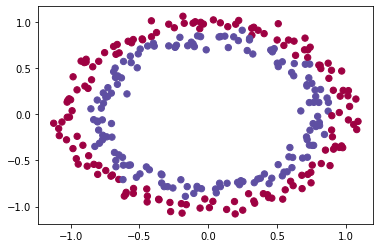

In [ ]:
train_X, train_Y, test_X, test_Y = load_dataset()

In [ ]:
# defining model
def model(X, Y, learning_rate , num_iterations , print_cost , initialization ):
     
  grads = {}
  costs = [] # to keep track of the loss
  m = X.shape[1] # number of examples
  layers_dims = [X.shape[0], 10, 5, 1]
    
  # Initialize parameters dictionary.
  if initialization == "zeros":
    parameters = initialize_parameters_zeros(layers_dims)
  elif initialization == "random":
    parameters = initialize_parameters_random(layers_dims)
  elif initialization == "he":
    parameters = initialize_parameters_he(layers_dims)

  # Loop (gradient descent)

  for i in range(num_iterations):
    
    # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
    a3, cache = forward_propagation(X, parameters)
        
    # Loss
    cost = compute_loss(a3, Y)

    # Backward propagation.
    grads = backward_propagation(X, Y, cache)
        
    # Update parameters.
    parameters = update_parameters(parameters, grads, learning_rate)
        
    # Print the loss every 1000 iterations
    if print_cost and i % 1000 == 0:
      print("Cost after iteration {}: {}".format(i, cost))
      costs.append(cost)
            
  # plot the loss
  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
    
  return parameters

**Zero Initialization**

In [ ]:
# initialize_parameters_zeros 

def initialize_parameters_zeros(layers_dims):
    
  parameters = {}
  L = len(layers_dims)            # number of layers in the network
    
  for l in range(1, L):
    parameters['W' + str(l)] = np.zeros(shape=(layers_dims[l], layers_dims[l-1]))
    parameters['b' + str(l)] = np.zeros(shape=(layers_dims[l], 1))
        
  return parameters

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


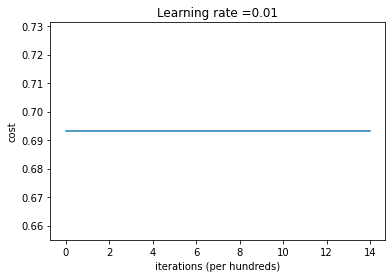

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
parameters = model(train_X, train_Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [ ]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


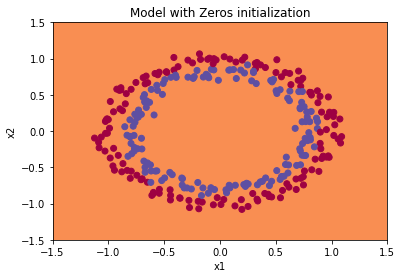

In [ ]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Random Initialization**

In [ ]:
# initialize_parameters_random

def initialize_parameters_random(layers_dims):
  
  np.random.seed(3)               # This seed makes sure "random" numbers will be the as ours
  parameters = {}
  L = len(layers_dims)            # integer representing the number of layers
    
  for l in range(1, L):
      
    parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
    parameters['b' + str(l)] = np.zeros(shape=(layers_dims[l], 1))
        

  return parameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 0: inf
Cost after iteration 1000: 0.6247924745506072
Cost after iteration 2000: 0.5980258056061102
Cost after iteration 3000: 0.5637539062842213
Cost after iteration 4000: 0.5501256393526495
Cost after iteration 5000: 0.5443826306793814
Cost after iteration 6000: 0.5373895855049121
Cost after iteration 7000: 0.47157999220550006
Cost after iteration 8000: 0.39770475516243037
Cost after iteration 9000: 0.3934560146692851
Cost after iteration 10000: 0.3920227137490125
Cost after iteration 11000: 0.38913700035966736
Cost after iteration 12000: 0.3861358766546214
Cost after iteration 13000: 0.38497629552893475
Cost after iteration 14000: 0.38276694641706693


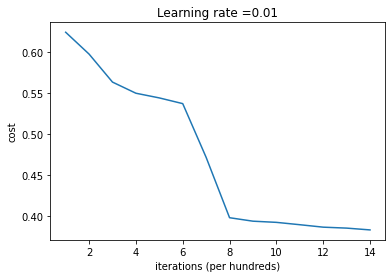

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
parameters = model(train_X, train_Y,learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Here we can see "inf" as the cost after the iteration 0, this is because of numerical roundoff. A more numerically sophisticated implementation would fix this, but for the purposes of this notebook, it isn't really worth worrying about.

In any case, we've now broken the symmetry, and this gives noticeably better accuracy than before. The model is no longer outputting all 0s. Progress!

In [ ]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


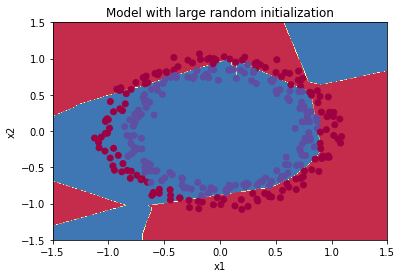

In [ ]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**He Initialization**

This is named for the first author of He et al., 2015. ( If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`)

In [ ]:
# initialize_parameters_he

def initialize_parameters_he(layers_dims):
  
  np.random.seed(3)
  parameters = {}
  L = len(layers_dims) - 1 # integer representing the number of layers
     
  for l in range(1, L + 1):
    
    parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2./layers_dims[l-1])
    parameters['b' + str(l)] = np.zeros(shape=(layers_dims[l], 1))
        
        
  return parameters

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893805
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071794
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322562
Cost after iteration 9000: 0.1859728720920684
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273551
Cost after iteration 12000: 0.09917746546525937
Cost after iteration 13000: 0.08457055954024283
Cost after iteration 14000: 0.07357895962677366


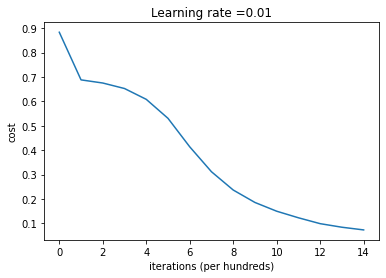

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
parameters = model(train_X, train_Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

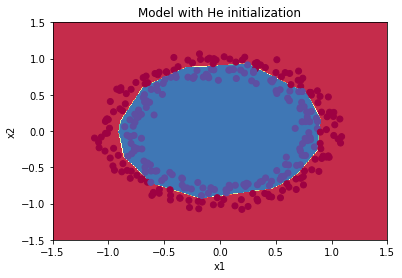

In [ ]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Conclusion**

<table> 
    <tr>
        <td>
            <b>Model</b>    
        </td>
        <td>
            <b>Train accuracy</b>
        </td>
        <td>
            <b>Problem/Comment</b>
        </td>
    </tr>
        <td>
        3-layer Neural Network with zeros initialization
        </td>
        <td>
        50%
        </td>
        <td>
        fails to break symmetry
        </td>
    <tr>
        <td>
        3-layer Neural Network with large random initialization
        </td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
    </tr>
    <tr>
        <td>
        3-layer Neural Network with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
    </tr>
</table> 